In [19]:
import numpy as np
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
from itertools import combinations

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data_df=pd.read_csv('./housing.csv', header=None, delim_whitespace=True, names=column_names) #, delimiter=r"\s+")

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per $10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

In [3]:
data_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
data_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
X = data_df.drop('MEDV', axis=1)
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [7]:
y = data_df['MEDV']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [12]:
model = LinearRegression().fit(X, y)

model.intercept_

model.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [9]:
y_pred = model.predict(X)
y_pred

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211,
       18.99949651, 21.58679568, 20.90652153, 19.55290281, 19.28348205,
       19.29748321, 20.52750979, 16.91140135, 16.17801106, 18.40613603,
       12.52385753, 17.67103669, 15.83288129, 13.80628535, 15.67833832,
       13.38668561, 15.46397655, 14.70847428, 19.54737285, 20.8764282 ,
       11.45511759, 18.05923295,  8.81105736, 14.28275814, 13.70675891,
       23.81463526, 22.34193708, 23.10891142, 22.91502612, 31.35762569,
       34.21510225, 28.02056414, 25.20386628, 24.60979273, 22.94149176,
       22.09669817, 20.42320032, 18.03655088,  9.10655377, 17.20607751,
       21.28152535, 23.97222285, 27.6558508 , 24.04901809, 15.3618477 ,
       31.15264947, 24.85686978, 33.10919806, 21.77537987, 21.08493555,
       17.8725804 , 18.51110208, 23.98742856, 22.55408869, 23.37308644,
       30.36148358, 25.53056512, 21.11338564, 17.42153786, 20.78

In [52]:
def find_pair(features, objective):
    C = []
    features.remove(objective)
    for i in range(len(features)):
        C.append(list(combinations(features, i)))

    excluded = C

    return excluded

In [71]:
features = column_names[:-1]
for feature in features:
    excludeds = find_pair(column_names[:-1], feature)

    difference = np.zeros(y.size)
    count = 0

    for i in excludeds:
        for excluded in i:
            if excluded == ():
                y_pred_excluded = np.empty(y.size)
                y_pred_excluded.fill(np.average(y))
            else:
                X_tmp = X[X.columns.intersection(list(excluded))]
                model_excluded = LinearRegression().fit(X_tmp, y)
                y_pred_excluded = model_excluded.predict(X_tmp)

            included = list(excluded)
            included.append(feature)

            X_tmp = X[X.columns.intersection(included)]
            model_included = LinearRegression().fit(X_tmp, y)
            y_pred_included = model_included.predict(X_tmp)

            diff = y_pred_included - y_pred_excluded
            difference = np.add(difference, diff)
            count += 1

    average_diff = np.divide(difference, count)
    d = {feature: X[feature], 'Shapley Values': average_diff}
    df = pd.DataFrame(data=d)
    df.to_csv(f'./{feature}_SHAP.csv', index=False)
            


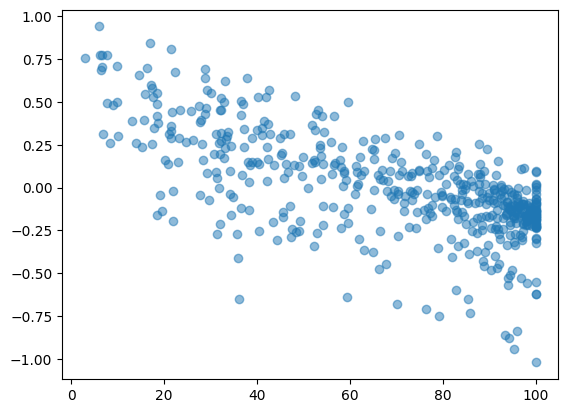

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

example = pd.read_csv('./AGE_SHAP.csv')
example.head()

plt.scatter(example['AGE'], example['Shapley Values'], alpha=0.5)
plt.show()

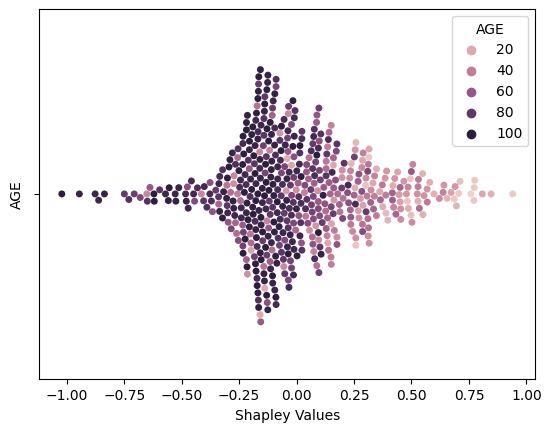

In [127]:
sns.swarmplot(data=example, x='Shapley Values', hue='AGE')
plt.ylabel('AGE')
plt.show()

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [99]:
d = {'feature': [], 'feature_value': [], 'shapley_value': []}
summary_df = pd.DataFrame(data=d)

for root, dirs, files in os.walk('.'):
    for file in files:
        if '.csv' in file and 'housing' not in file and 'summary' not in file:
            df = pd.read_csv(os.path.join(root, file))
            feature = [df.columns[0]] * len(df)
            feature_value = df[df.columns[0]]
            shapley_value = df[df.columns[1]]
            
            d = {'feature': feature, 'feature_value': feature_value, 'shapley_value': shapley_value}
            summary_df_part = pd.DataFrame(data=d)
            summary_df = pd.concat([summary_df, summary_df_part])

summary_df.to_csv('./summary_SHAP.csv', index=False)

In [102]:
summary_df = pd.read_csv('./summary_SHAP.csv')
summary_df.head()

,feature,feature_value,shapley_value
0,AGE,65.2,-0.011591
1,AGE,78.9,-0.351422
2,AGE,61.1,-0.037543
3,AGE,45.8,0.054350
4,AGE,54.2,-0.105941


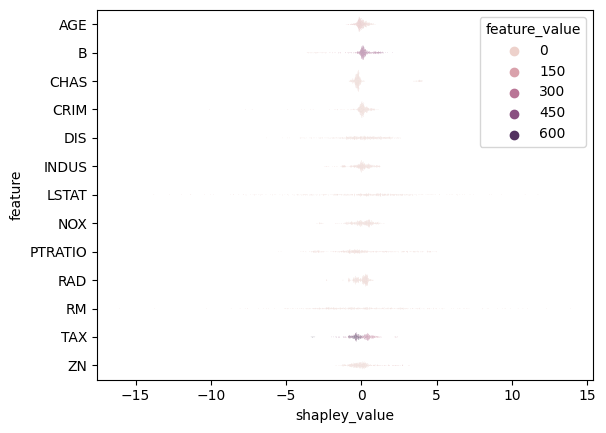

In [128]:
sns.swarmplot(data=summary_df, x='shapley_value', y='feature', hue='feature_value', size=0.3)
plt.show()

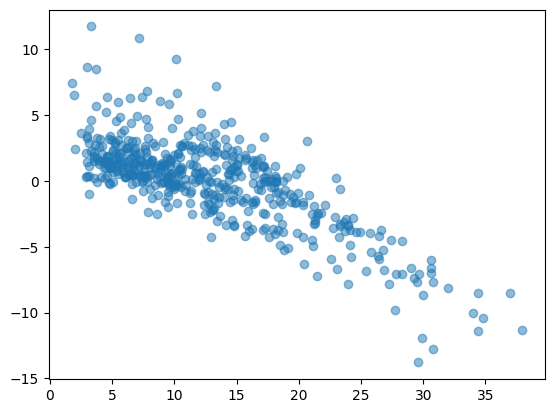

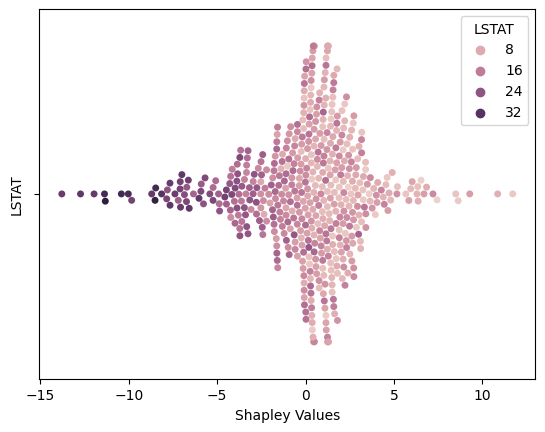

In [137]:
interest = 'B'

example = pd.read_csv(f'./{interest}_SHAP.csv')
example.head()

plt.scatter(example[interest], example['Shapley Values'], alpha=0.5)
plt.show()

sns.swarmplot(data=example, x='Shapley Values', hue=interest)
plt.ylabel(interest)
plt.show()

Use SHAP explainer

Permutation explainer: 507it [00:15, 11.59it/s]                         


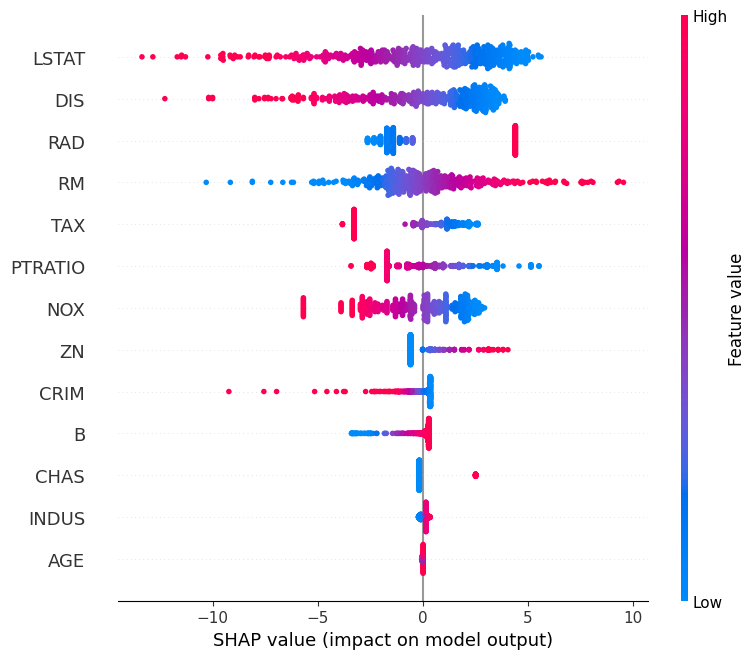

In [142]:
import shap

model = LinearRegression().fit(X, y)

explainer = shap.Explainer(model.predict, X)
shap_values = explainer(X)

shap.summary_plot(shap_values)